In [55]:
import pydicom
import nibabel as nib
import string
import gzip
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from scipy import ndimage
import sys
import cv2

In [65]:
path = 'AbdominalCT/_102029__0902083116/*.dcm'
path_nii = 'AbdominalCT/_102029__0902083116/24883815.nii.gz'
path_out = 'AbdominalCT/_102029__0902083116/mask/'

In [45]:
# NIFTI(.nii)파일 로드(1)
nii_file = nib.load(path1)
nii_arr = nii_file.get_fdata()
nii_arr.shape

(512, 512, 142)

In [90]:
# 3D arr를 2D arr로 indexing 및 slicing
nii_arr_1 = nii_arr[340,:,:]

# 2D 확인
print("shape:",nii_arr_1.shape)
print("ndim:",nii_arr_1.ndim)

shape: (512, 142)
ndim: 2


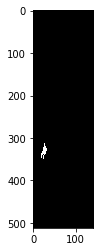

In [111]:
# nii 원본 출력
plt.imshow(nii_arr_1,cmap='gray')

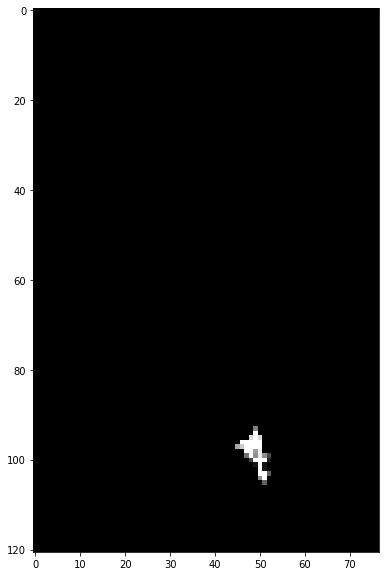

In [156]:
# nii 회전, 좌우변경, 종횡비 재설정
rotated_img = ndimage.rotate(nii_arr_1,90) #img 90 degree rotation
#img_mirror = cv2.flip(rotated_img, 0) #img mirror

nii_new = cv2.resize(rotated_img, (0, 0), fx=0.15, fy=0.85) # 가로,세로 리사이즈
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(nii_new, cmap='gray')

In [161]:
files = []
nii_index = 0

print('glob: {}'.format(sys.argv[1]))

# Dicom filecount 세기
for fname in glob(path, recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))
    
files_count = int(len(files))
print("file count: {}".format(files_count))

glob: -f
loading: AbdominalCT/_102029__0902083116\ser002img00001.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00002.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00003.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00004.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00005.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00006.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00007.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00008.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00009.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00010.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00011.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00012.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00013.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00014.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00015.dcm
loading: AbdominalCT/_102029__0902083116\ser002img00016.dcm
loading: AbdominalCT/_102029__0

In [162]:
# NifTi files color change and save the png files 
for index in range(files_count):
    
    rotated_img = ndimage.rotate(nii_arr[nii_index,:,:],90) #img 90 degree rotation
    #img_mirror = cv2.flip(rotated_img, 0) #img mirror 
    plt.imsave(path_out+"mask_nii%d.png"%(nii_index), rotated_img, cmap='gray') # save as folder name

    nii_index = nii_index + 1
    print("NiFTi index: ", nii_index)

NiFTi index:  1
NiFTi index:  2
NiFTi index:  3
NiFTi index:  4
NiFTi index:  5
NiFTi index:  6
NiFTi index:  7
NiFTi index:  8
NiFTi index:  9
NiFTi index:  10
NiFTi index:  11
NiFTi index:  12
NiFTi index:  13
NiFTi index:  14
NiFTi index:  15
NiFTi index:  16
NiFTi index:  17
NiFTi index:  18
NiFTi index:  19
NiFTi index:  20
NiFTi index:  21
NiFTi index:  22
NiFTi index:  23
NiFTi index:  24
NiFTi index:  25
NiFTi index:  26
NiFTi index:  27
NiFTi index:  28
NiFTi index:  29
NiFTi index:  30
NiFTi index:  31
NiFTi index:  32
NiFTi index:  33
NiFTi index:  34
NiFTi index:  35
NiFTi index:  36
NiFTi index:  37
NiFTi index:  38
NiFTi index:  39
NiFTi index:  40
NiFTi index:  41
NiFTi index:  42
NiFTi index:  43
NiFTi index:  44
NiFTi index:  45
NiFTi index:  46
NiFTi index:  47
NiFTi index:  48
NiFTi index:  49
NiFTi index:  50
NiFTi index:  51
NiFTi index:  52
NiFTi index:  53
NiFTi index:  54
NiFTi index:  55
NiFTi index:  56
NiFTi index:  57
NiFTi index:  58
NiFTi index:  59
NiFTi 